In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
df_flights = sns.load_dataset('flights')
df_flights.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
df_flights_pivot = pd.pivot_table(data=df_flights, values='passengers',
                                  columns='year', index='month', aggfunc=np.mean)
df_flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


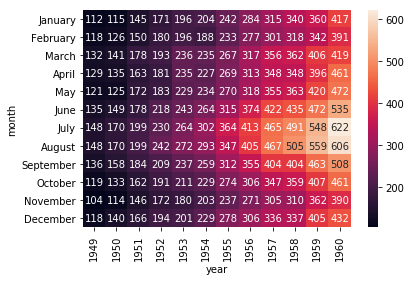

In [192]:
sns.heatmap(df_flights_pivot, annot=True,fmt="d")

In [36]:
program = np.array([1,2,3,4,5,6,6,7])
df = pd.DataFrame(program)
df
#pd.pivot_table(data=,values=,
#               columns='0', index=0, aggfunc=np.mean)

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,6
7,7


In [18]:
import json
from trans_data.src import onehot 

In [16]:
with open('./trans_data/src/dataset.json') as jsonfile:
    vector_dict = json.load(jsonfile)

In [28]:
md = onehot.MakeData()
programs_and_labels_data = md.program_sep(vector_dict)
x = []
y = []
for programs, labels in programs_and_labels_data:
    train_x = []
    train_y = []
    for i, separate_line in enumerate(programs):
        train_x.append(md.onehot_vec(separate_line, 180))
#       print(len(x))
        train_y.append('{}'.format(labels))
#       print(len(y))
#       print(y)
    x.append(train_x)
    y.append(train_y)

In [185]:
print(np.shape(x[0]))
print(np.shape(x[0][0]))
attention_mean = np.ones((31,25))
print(attention_mean.shape)

(31, 25, 181)
(25, 181)
(31, 25)


In [188]:
np.shape(x[0])[0]
np.shape(attention_mean)
attention_mean[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [166]:
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

In [183]:
[l.argmax() for l in x[0][i]]

[35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

/home/koyama/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


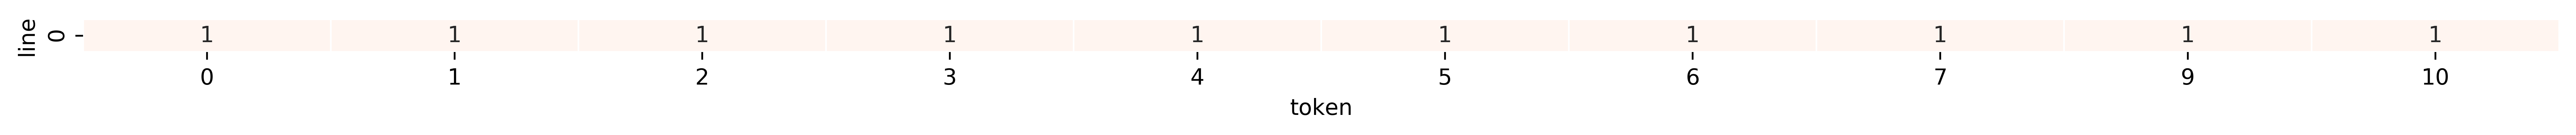

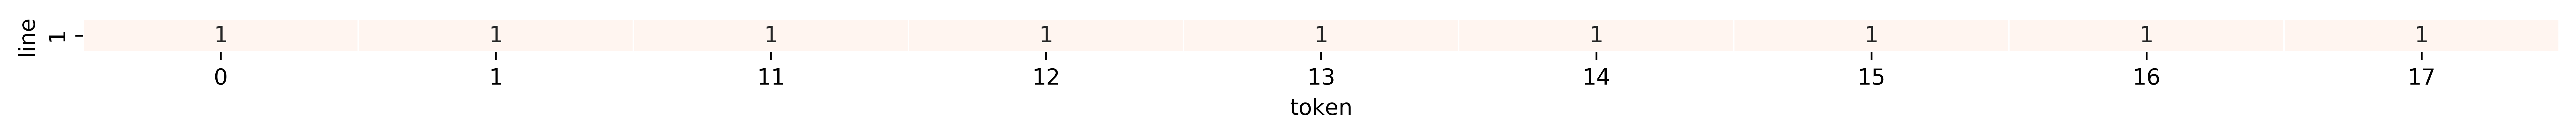

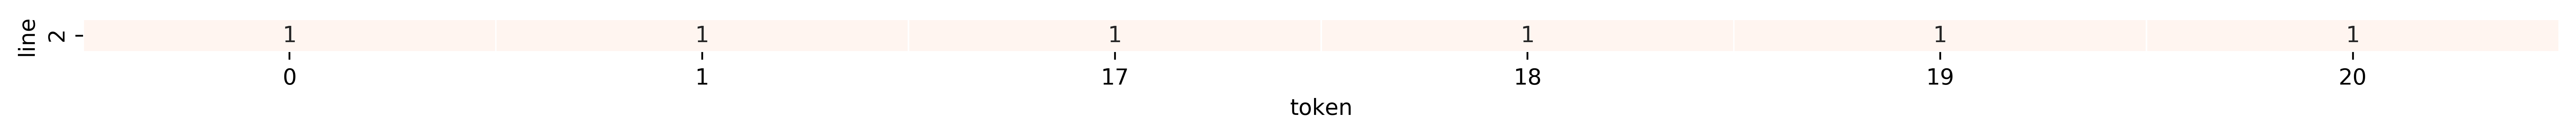

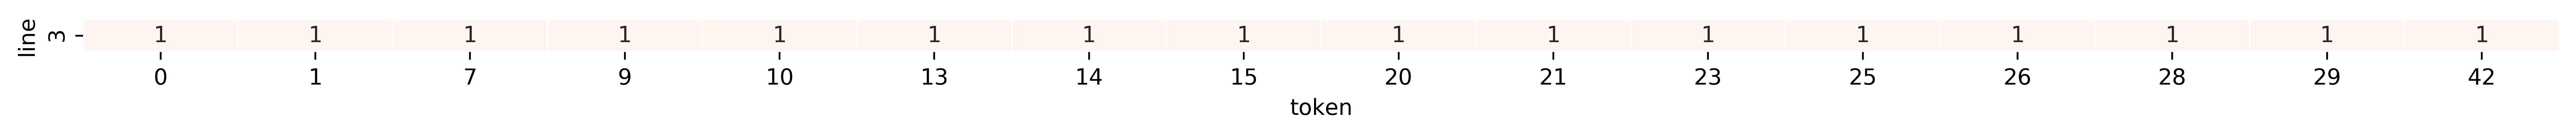

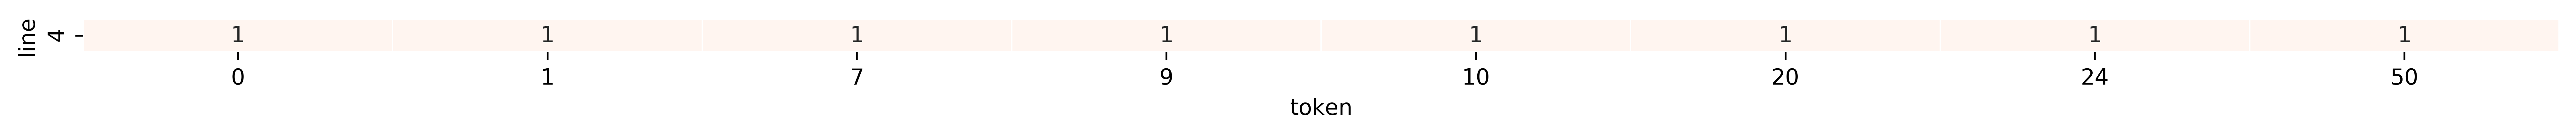

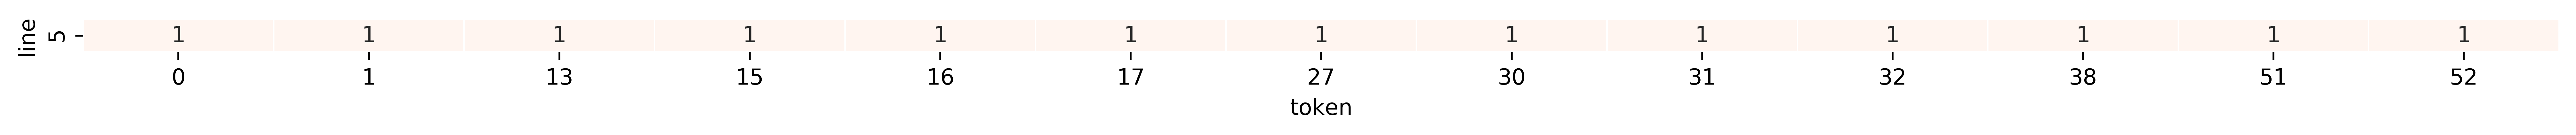

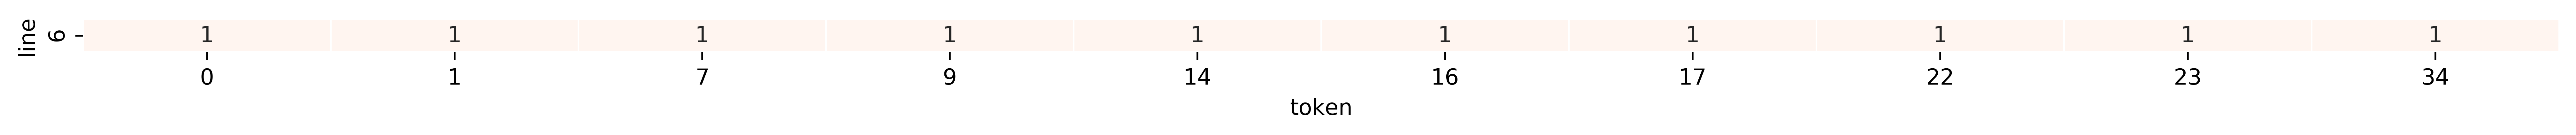

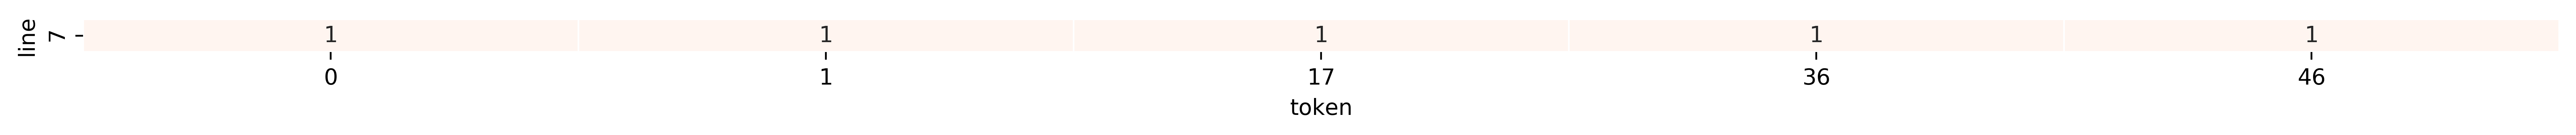

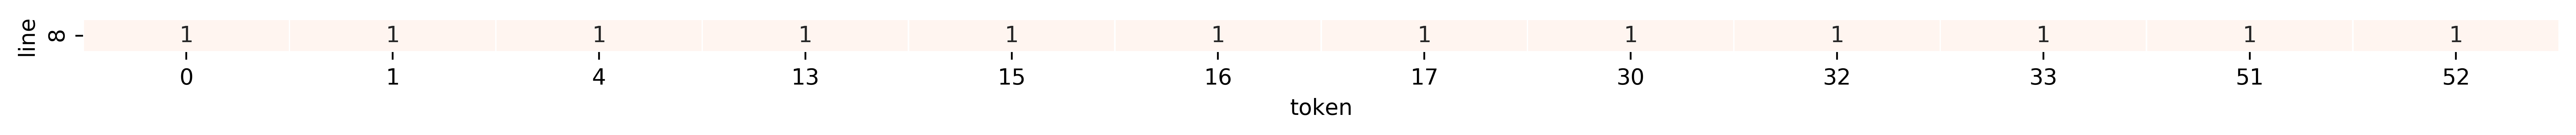

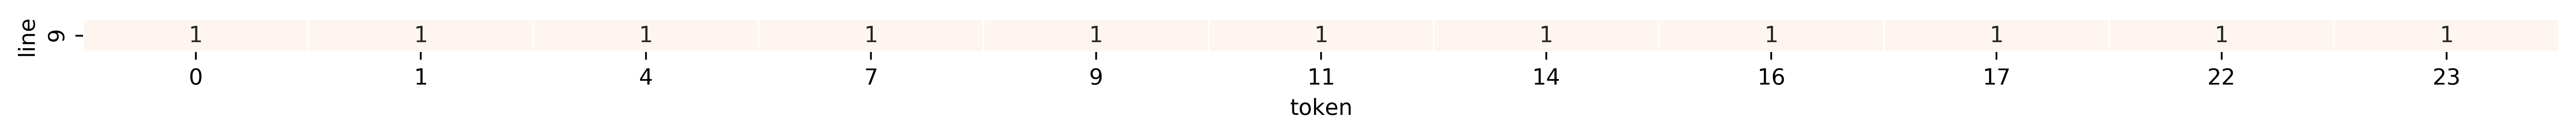

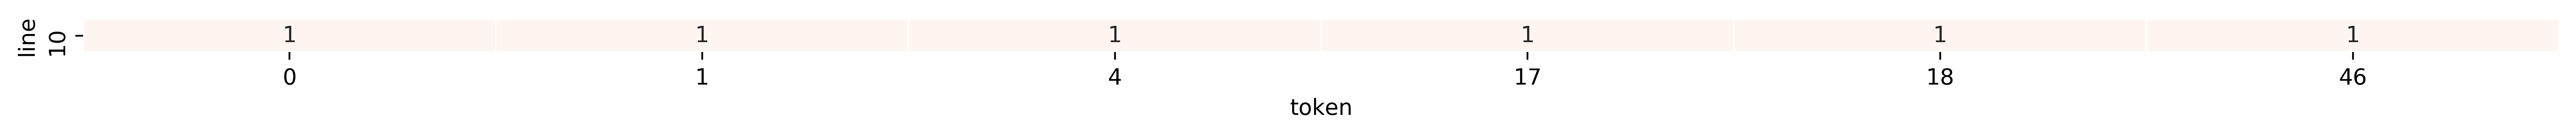

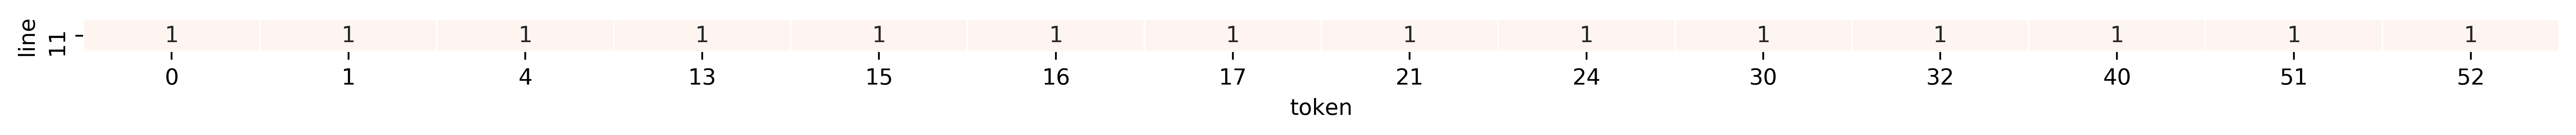

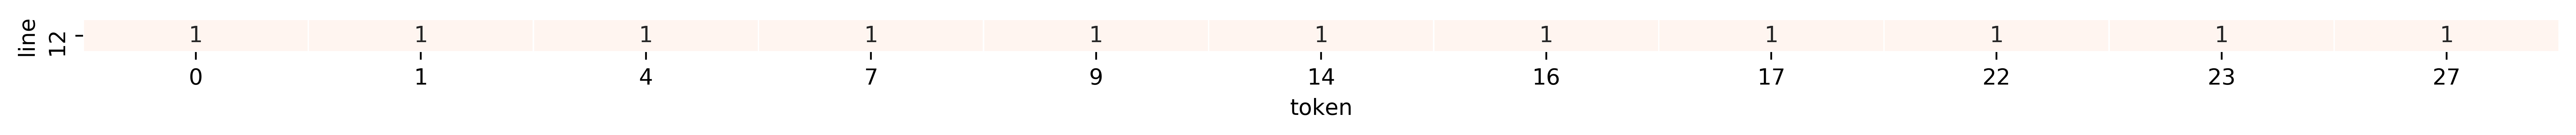

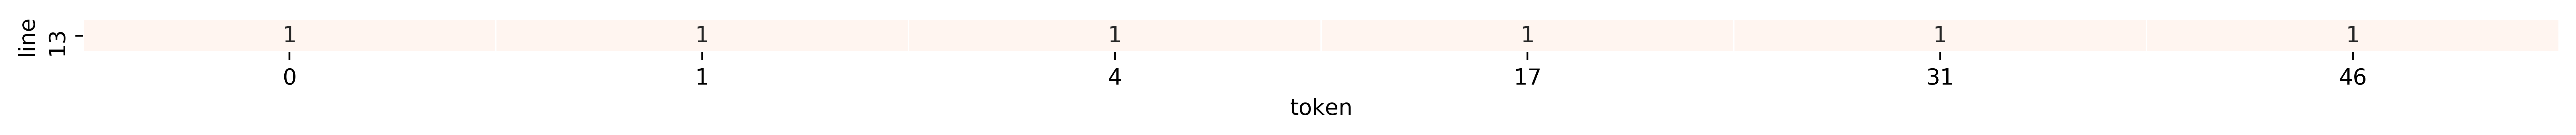

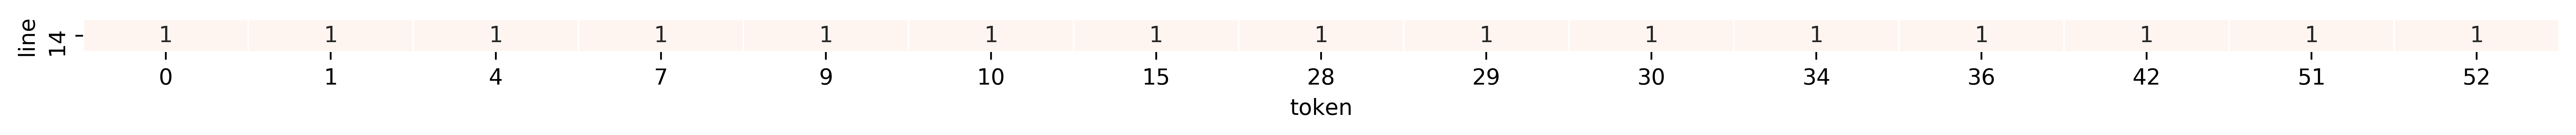

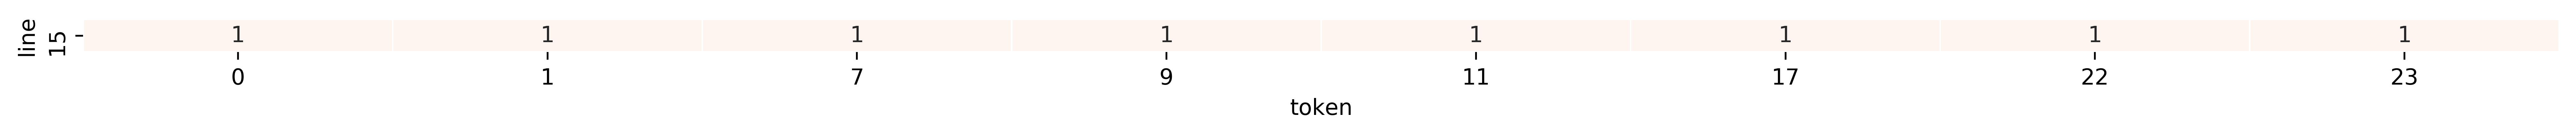

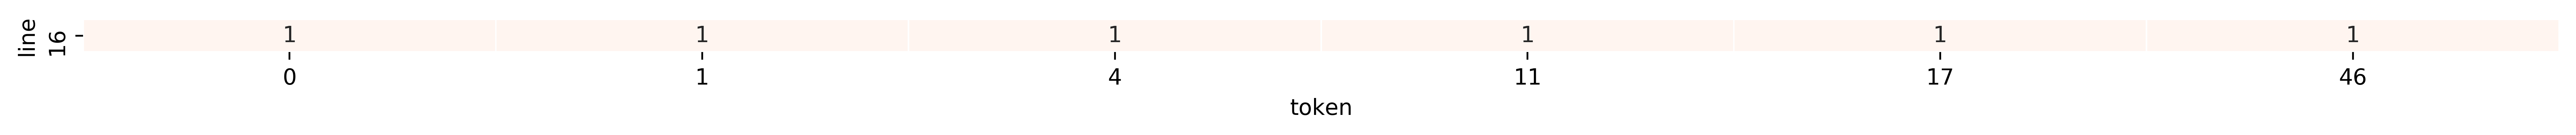

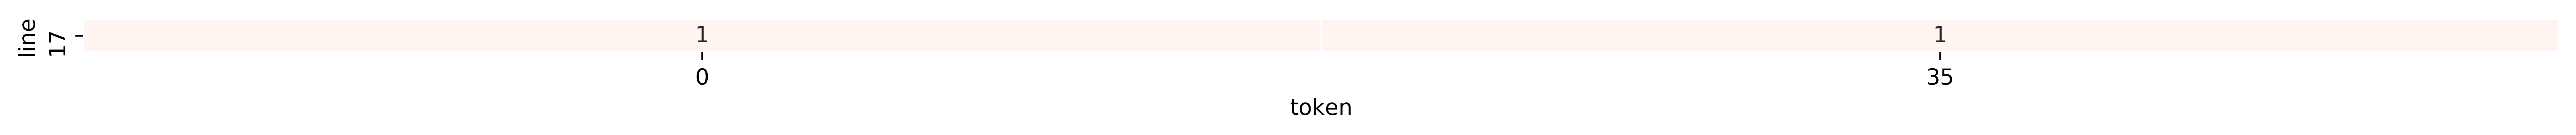

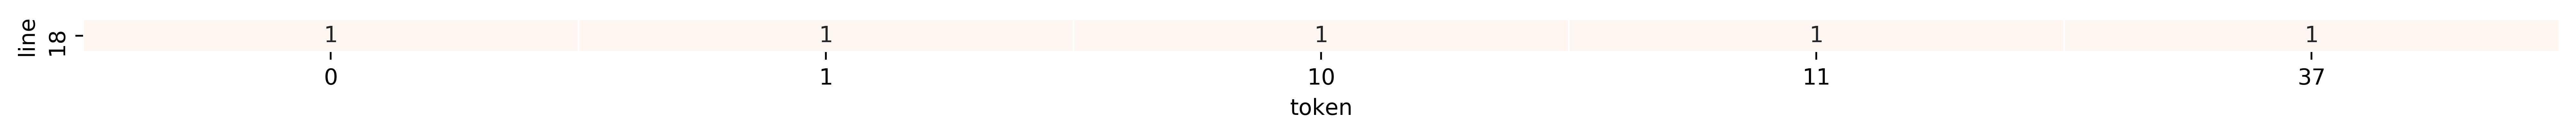

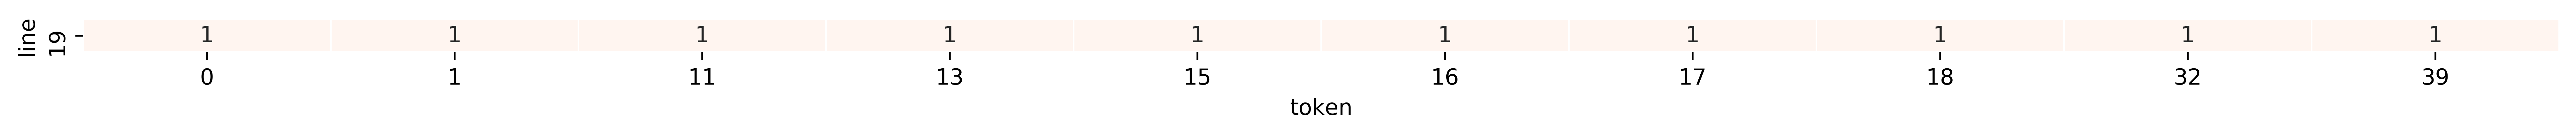

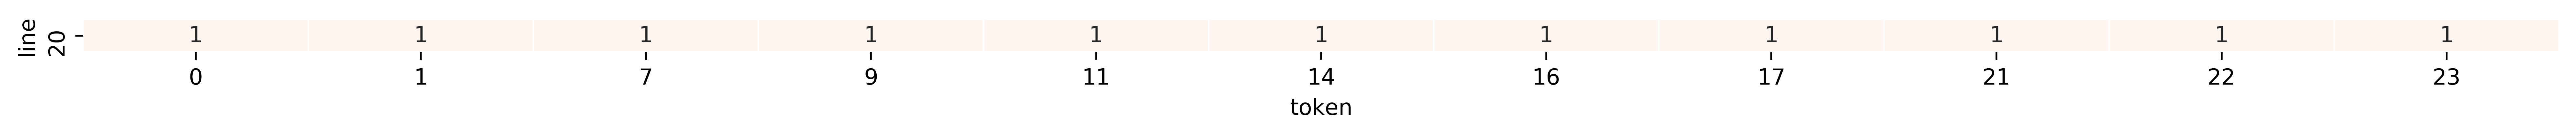

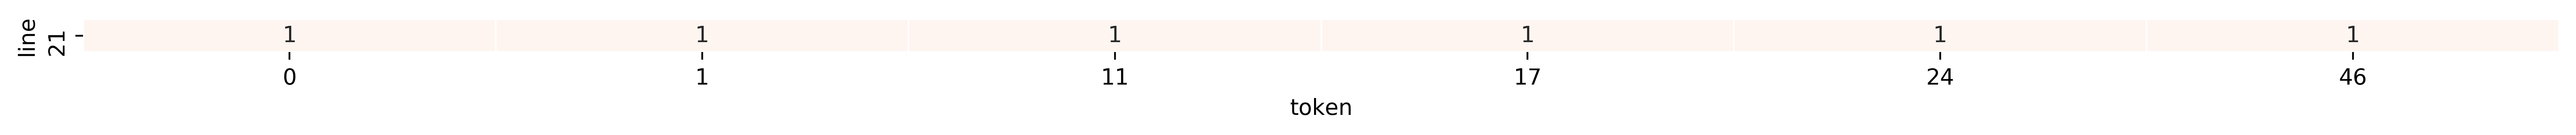

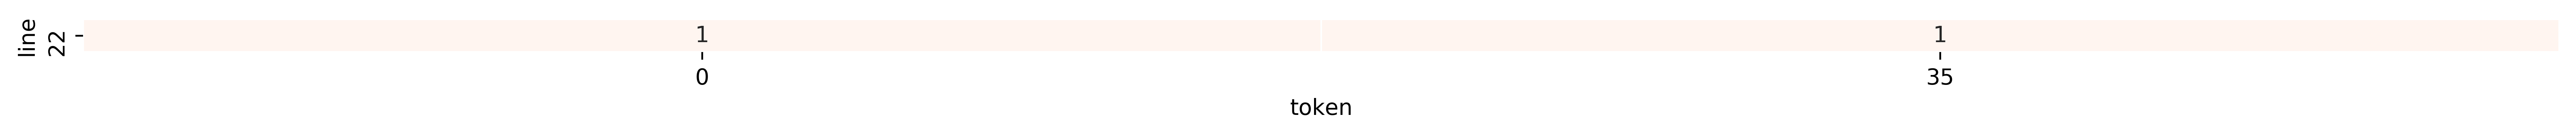

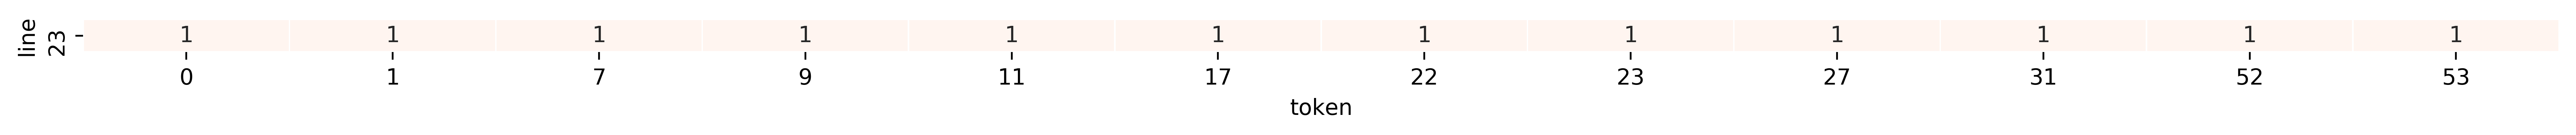

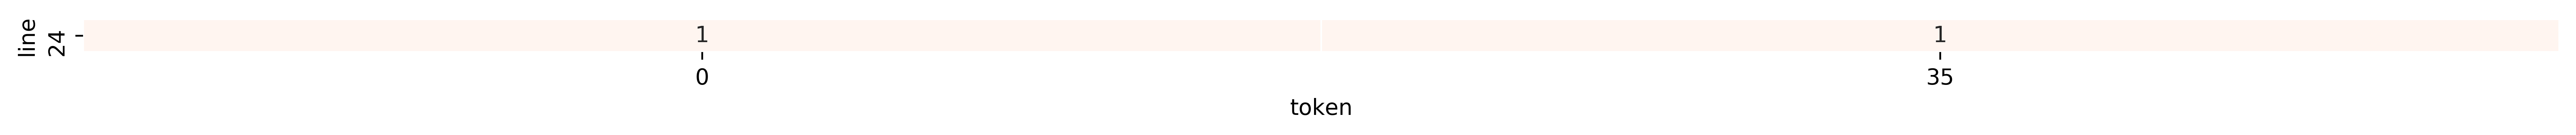

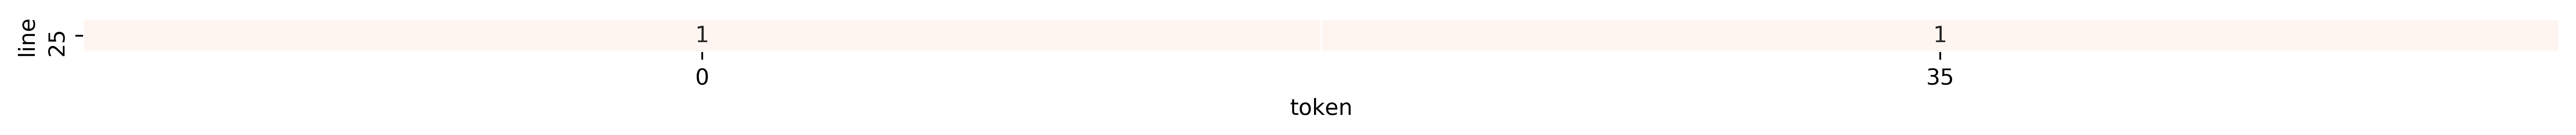

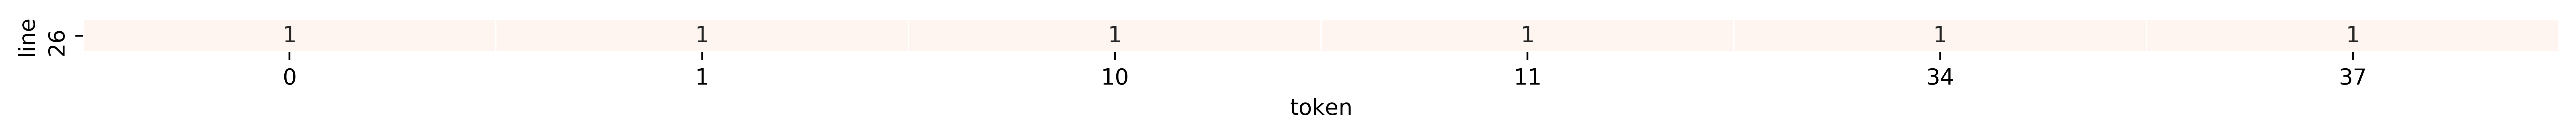

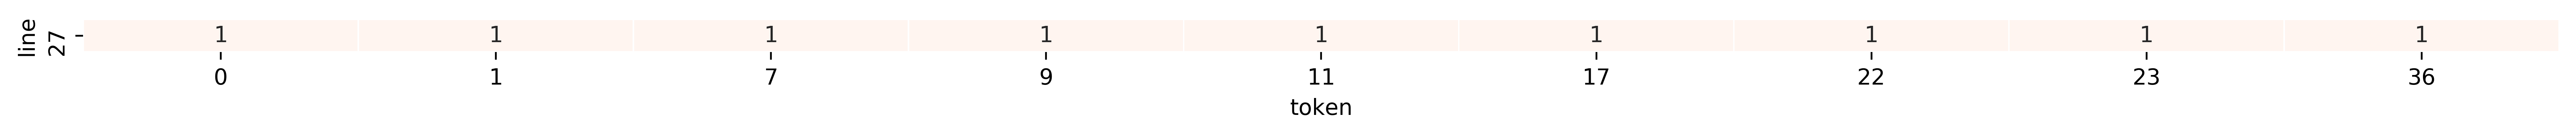

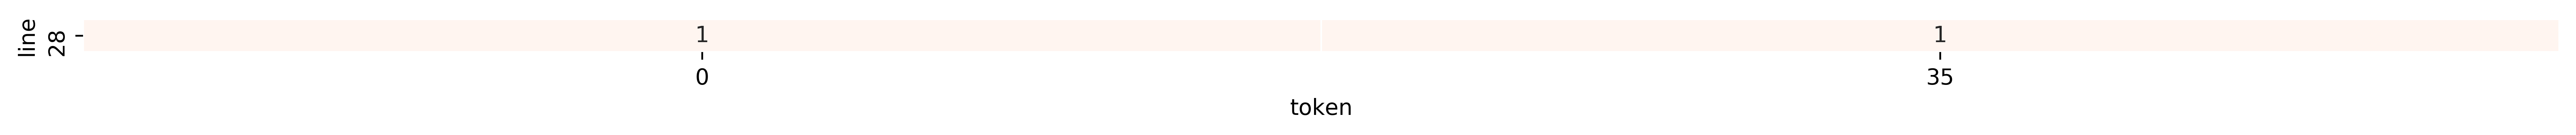

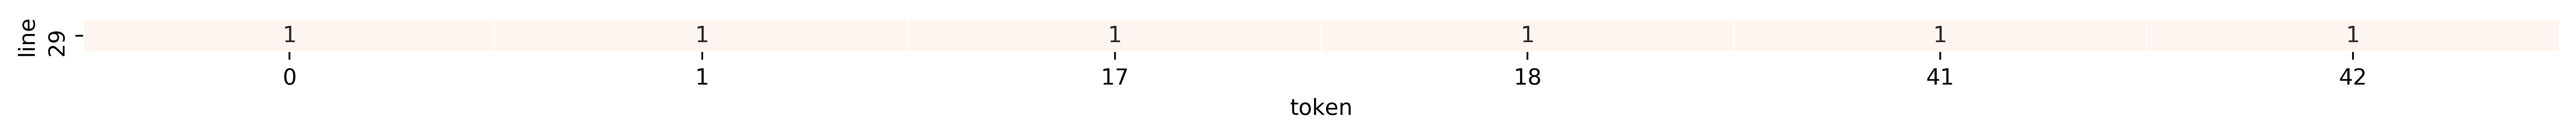

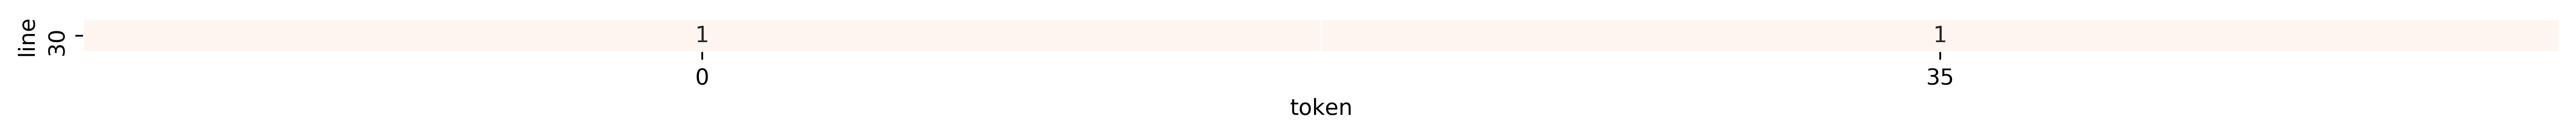

In [194]:
i=0
axlist = []
#fig = plt.figure(figsize=(10,1))
#ax = plt.axes() 
#for i in range(np.shape(x[0])[0]):
#exec("name%d = %d" % (i, fig.add_subplot(1,np.shape(x[0])[0],i+1)))
#plt.tight_layout()
#cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)

'''
期待するものは
入力データx -> (none, 25, 181)
attentionの重み -> (none, 25)
'''
for i in range(np.shape(x[0])[0]):
    #fig = plt.figure()
    fig = plt.figure(figsize=(20,10))
    axlist.append(fig.add_subplot(np.shape(x[0])[0],1,i+1))
    df = pd.DataFrame({'token' : [l.argmax() for l in x[0][i]],
                  'line' : i,
                  'attention' : attention_mean[i]
                  })
    df_attention_pivot = pd.pivot_table(data=df,
                                   values='attention',
                                   columns='token',
                                   index='line',
                                   aggfunc=np.mean)
    #print(df_attention_pivot)
    #sns.heatmap(df_attention_pivot,cbar=False)
    #print(df_attention_pivot)
    #fig.add_subplot(1,np.shape(x[0])[0],i+1)
    #axlist[i].heatmap(df_attention_pivot)
    heatmap = sns.heatmap(
            # mlca.results / np.average(mlca.results, axis=0), # Normalize to get relative results
            df_attention_pivot,
            cbar=False,
            annot=True,
            cmap='Reds',
            ax = axlist[i],
            linewidths=.5,
            square=False,
        )
    #plt.plot()
    #plt.show()
    #plt.savefig('output_heatmap.png')
pdf = PdfPages('test1.pdf')
fignums = plt.get_fignums()
print(fignums)
for fignum in fignums:
    plt.figure(fignum)
    pdf.savefig()
pdf.close()
    

In [144]:
print([l for in x[0][0]])

SyntaxError: invalid syntax (<ipython-input-144-c7ec9699837c>, line 1)

In [80]:
df_attention_pivot

token,0,1,2,3,4,5,6,7,9,10
line,,,,,,,,,,
0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


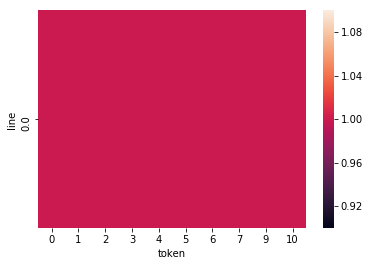

In [81]:
sns.heatmap(df_attention_pivot)

/home/koyama/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


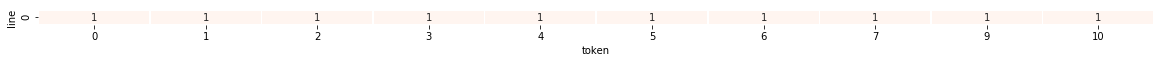

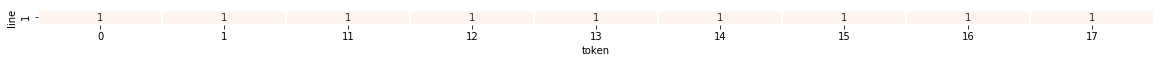

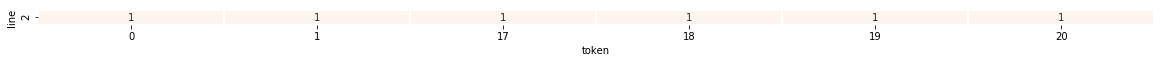

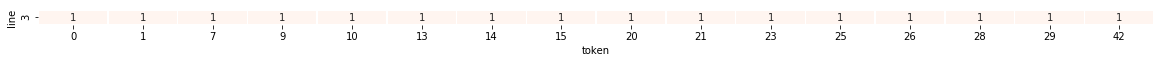

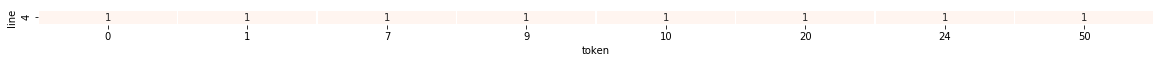

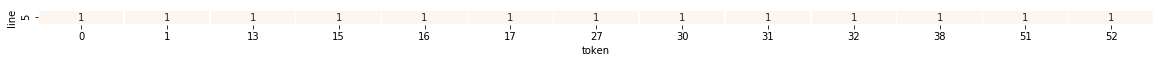

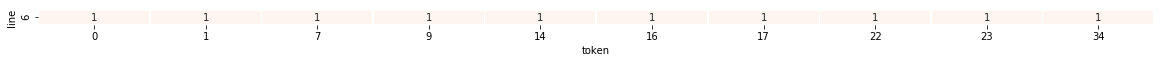

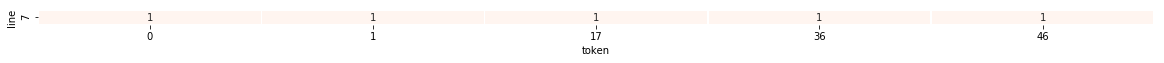

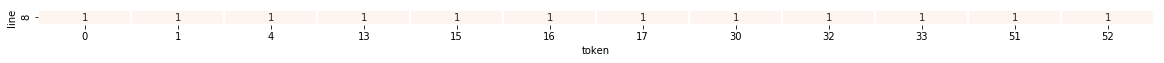

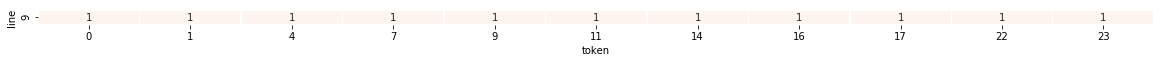

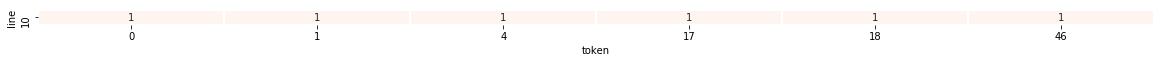

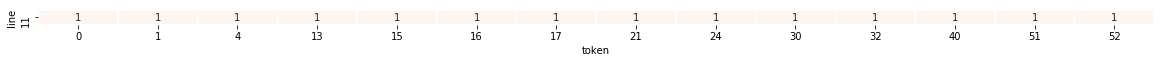

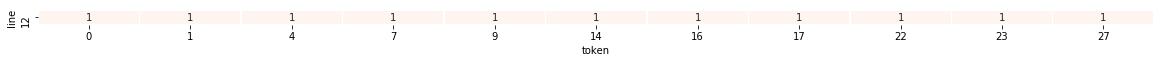

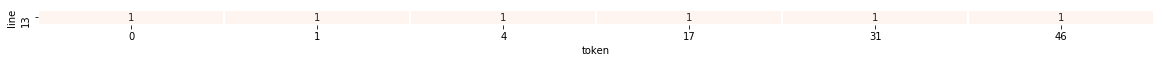

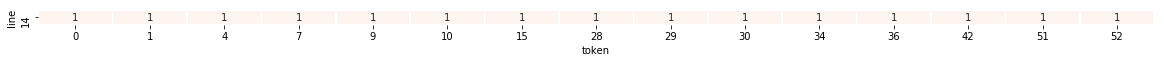

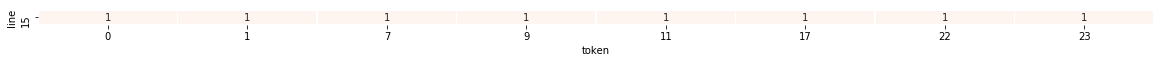

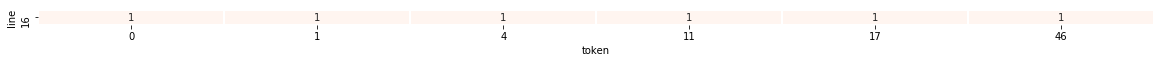

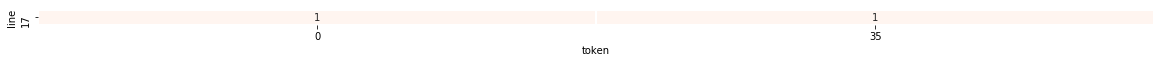

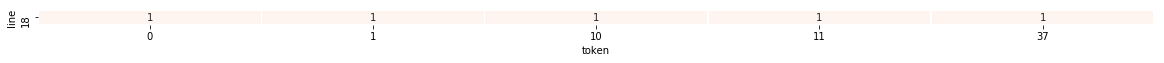

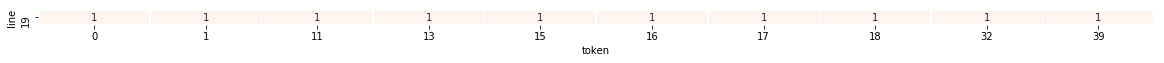

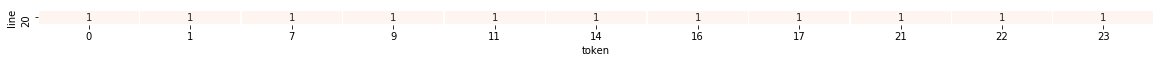

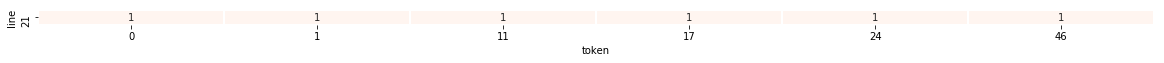

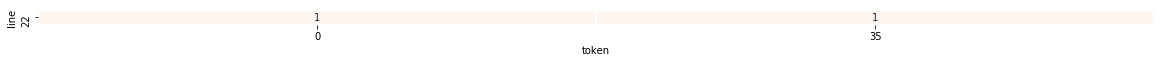

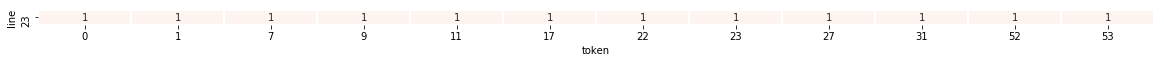

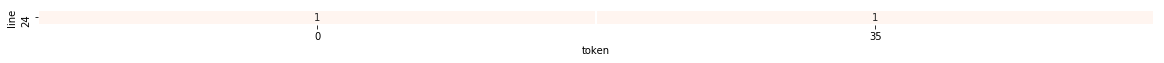

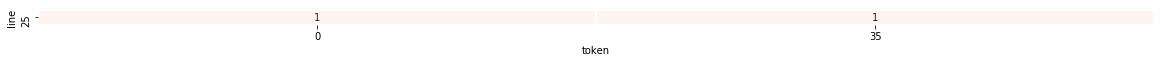

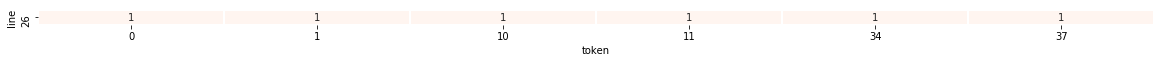

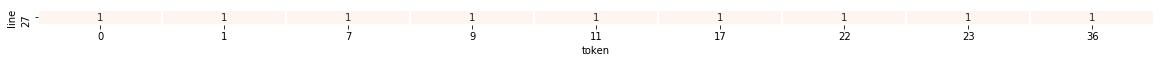

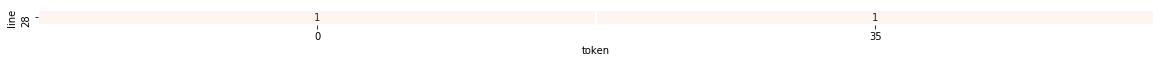

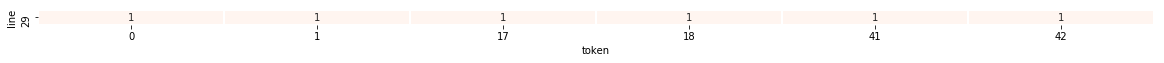

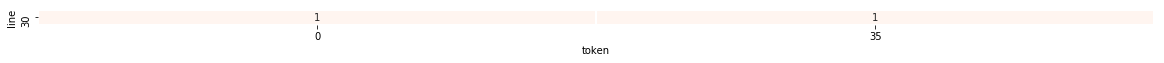

In [177]:
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

def attention_plot(x, attention_value):
    axlist = []
    for i in range(np.shape(x)[0]):
        fig = plt.figure(figsize=(20,10))
        axlist.append(fig.add_subplot(np.shape(x)[0],1,i+1))
        df = pd.DataFrame({'token' : [l.argmax() for l in x[i]],
                      'line' : i,
                      'attention' : attention_value[0][0]
                      })
        df_attention_pivot = pd.pivot_table(data=df,
                                       values='attention',
                                       columns='token',
                                       index='line',
                                       aggfunc=np.mean)
        heatmap = sns.heatmap(
                df_attention_pivot,
                cbar=False,
                annot=True,
                cmap='Reds',
                ax = axlist[i],
                linewidths=.5,
                square=False,
            )
    pdf = PdfPages('test1.pdf')
    fignums = plt.get_fignums()
    for fignum in fignums:
        plt.figure(fignum)
        pdf.savefig()
    pdf.close()

attention_plot(x[0], attention_mean)
